In [1]:
import numpy as np
import os

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.gridspec as grid_spec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px
# Ridgeline plots
import joypy

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
import scipy.stats as stats

from src.parameter_distributions import parameter_distributions
from src.feature_extraction import coarsen_density, scale_density, scale_population_curves, split_data

# **Density**

In [2]:
if not os.path.isfile("../data/dataset2/8x8_density.npy"):
    
    old_density = np.load("../data/dataset2/density.npy", allow_pickle = True)
 
    coarse_resolution = (25)**2
    density = np.empty((45*121*10, coarse_resolution))
    for i, v in enumerate(old_density):
        v = v.reshape(200,200)
        coarse_v = coarsen_density(v, I = 200, h = 1000/(199.0), bin_size = 8)
        density[i] = coarse_v
    
    np.save("../data/dataset2/8x8_density.npy", density, allow_pickle = True)

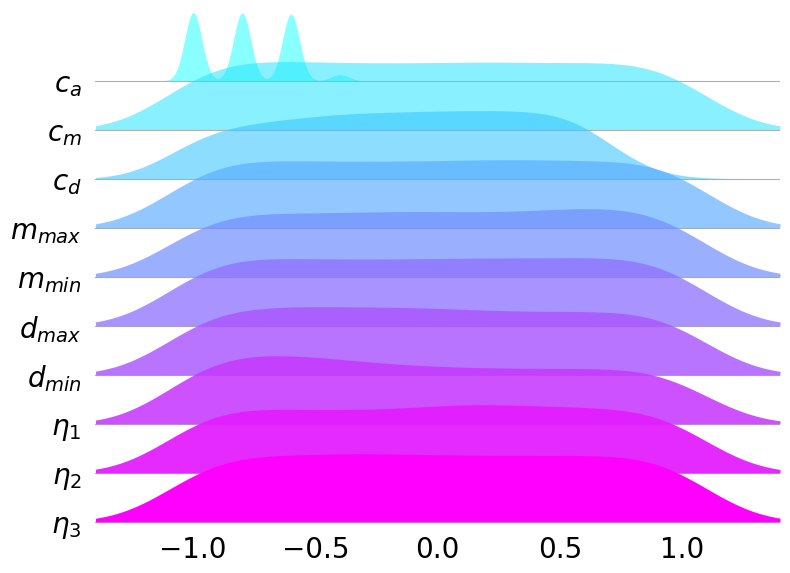

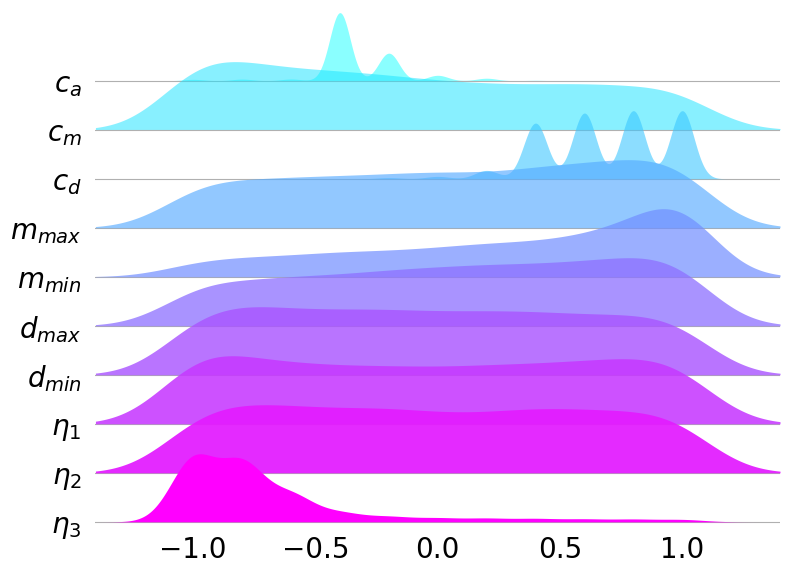

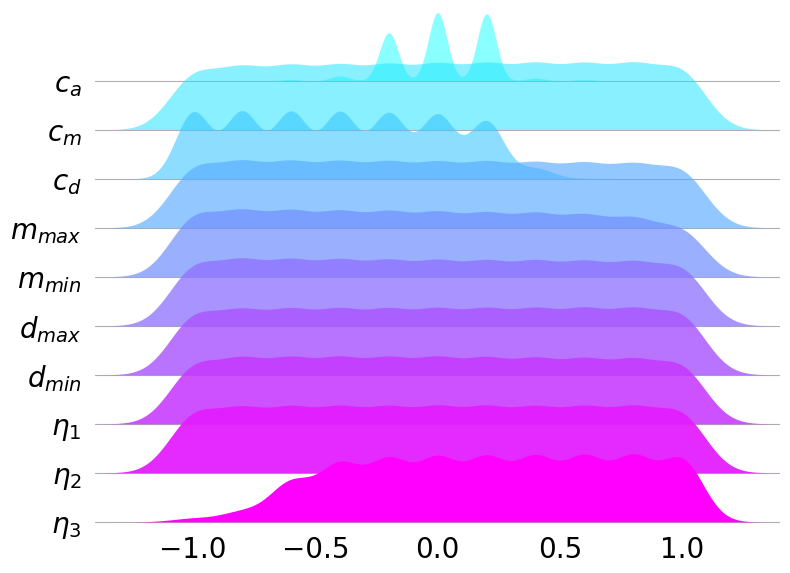

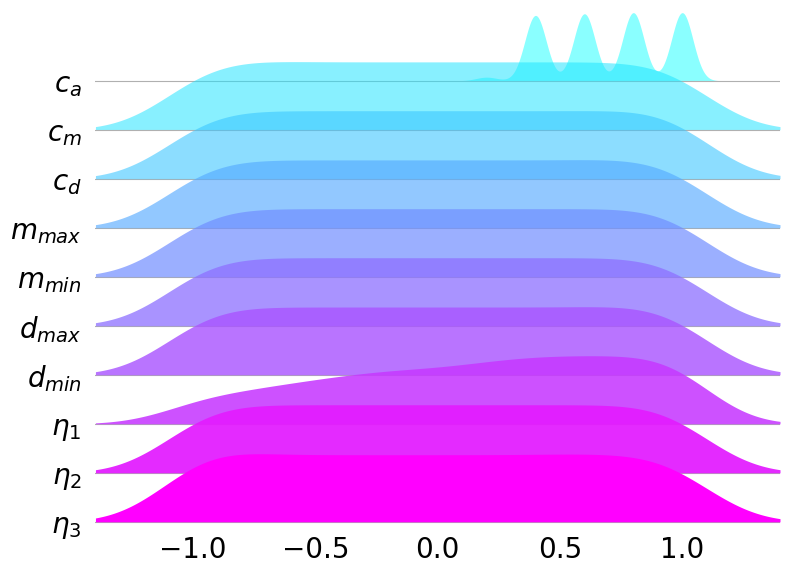

In [3]:
density = np.load("../data/dataset2/8x8_density.npy",allow_pickle = True)
    
## Reduce dimensions to 3
density_pca = PCA(n_components = 3, random_state = 0)
density_reduced = density_pca.fit_transform(density)

# Cluster
density_kmeans = KMeans(n_clusters = 4,n_init = 'auto', random_state = 0)
density_kmeans.fit(density_reduced)
labels = density_kmeans.labels_

num_clusters = 4
cluster_distns = []
for cluster_num in np.arange(num_clusters):
    cluster_distn = parameter_distributions(labels = labels,
                                          cluster_num = cluster_num)
    cluster_distns.append(cluster_distn)
    

labels_copy = np.zeros_like(labels)
cluster_distns_copy = cluster_distns.copy()

    
c_a_mean = np.zeros(num_clusters)
for i in np.arange(num_clusters):
    c_a_mean[i] = np.mean(cluster_distns[i]['c_a'])
    
for iold, inew in enumerate(np.argsort(c_a_mean)):
    labels_copy[labels == iold] = inew
    cluster_distns_copy[iold] = cluster_distns[inew]
# Using 1/φ as the overlap parameter for ridgeline plots
o = (1+np.sqrt(5))/2


for c in np.arange(num_clusters):

    cluster_distns_copy[c]['$c_a$'] = cluster_distns_copy[c].pop('c_a')
    cluster_distns_copy[c]['$c_m$'] = cluster_distns_copy[c].pop('c_m')
    cluster_distns_copy[c]['$c_d$'] = cluster_distns_copy[c].pop('c_d')
    
    cluster_distns_copy[c]['$m_{max}$'] = cluster_distns_copy[c].pop('mmax')
    cluster_distns_copy[c]['$m_{min}$'] = cluster_distns_copy[c].pop('mmin')
    cluster_distns_copy[c]['$d_{max}$'] = cluster_distns_copy[c].pop('dmax')
    cluster_distns_copy[c]['$d_{min}$'] = cluster_distns_copy[c].pop('dmin')
    
    cluster_distns_copy[c]['$\eta_1$'] = cluster_distns_copy[c].pop('eta1')
    cluster_distns_copy[c]['$\eta_2$'] = cluster_distns_copy[c].pop('eta2')
    cluster_distns_copy[c]['$\eta_3$'] = cluster_distns_copy[c].pop('eta3')
    
    
# Creating Ridgeline plots of parameter distributions in each cluster
for c in range(4):
    fig, ax = joypy.joyplot(cluster_distns_copy[c],
                               colormap = mpl.colormaps['cool'].resampled(10),
                               figsize = (8,6),
                               linecolor='#f0f0f0',
                               bins = 11,
                               grid = 'y',
                                ylabelsize = 20,
                               xlabelsize = 20,
                                ylim ='own',
                               overlap = 1/o,
                               fade=True,
                               linewidth = 0)
    ax[-1].xaxis.set_ticks_position('none')
    plt.show()
    fig.savefig(f"../figures/ridgeline_density_cluster_{c}.png")
    

# **Cell Counts**

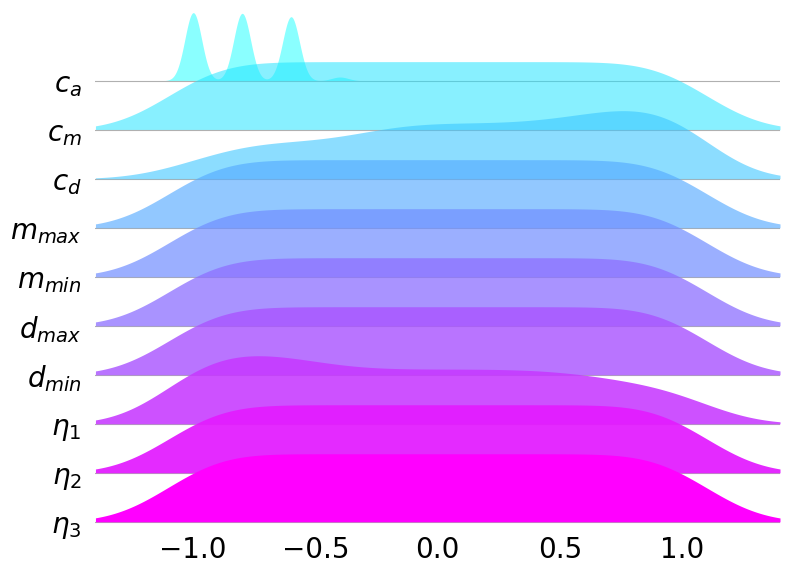

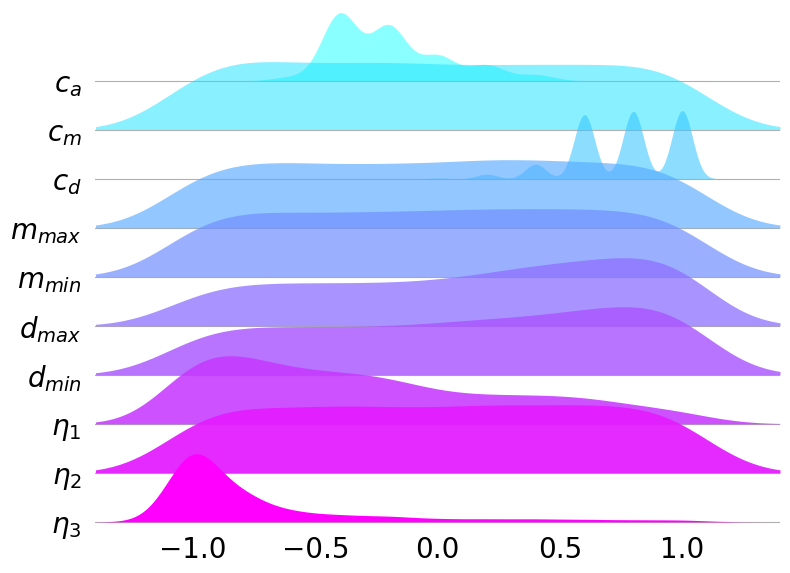

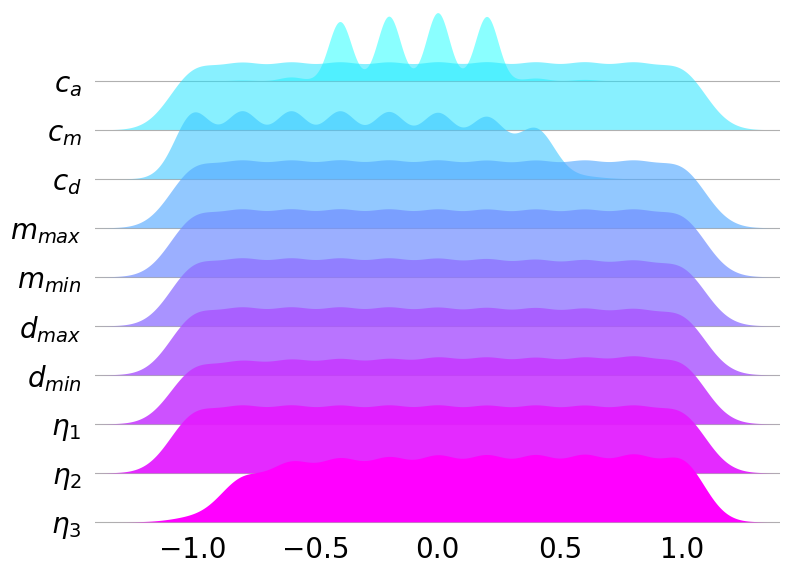

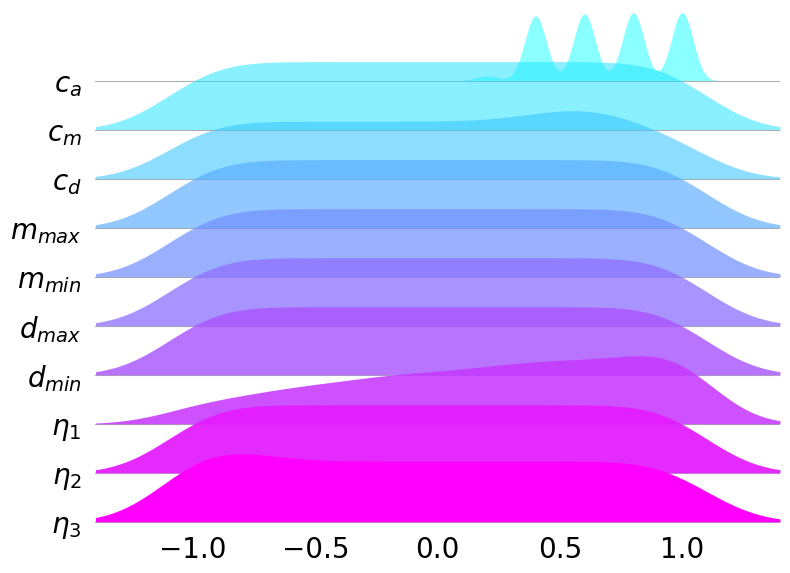

In [4]:
cell_counts = np.load("../data/dataset2/cell_counts.npy",allow_pickle = True)
cell_counts = cell_counts.reshape(45*121*10,4*241)
    
## Reduce dimensions to 3
cell_counts_pca = PCA(n_components = 3, random_state = 0)
cell_counts_reduced = cell_counts_pca.fit_transform(cell_counts)

# Cluster
cell_counts_kmeans = KMeans(n_clusters = 4,n_init = 'auto', random_state = 0)
cell_counts_kmeans.fit(cell_counts_reduced)
labels = cell_counts_kmeans.labels_

num_clusters = 4
cluster_distns = []
for cluster_num in np.arange(num_clusters):
    cluster_distn = parameter_distributions(labels = labels,
                                          cluster_num = cluster_num)
    cluster_distns.append(cluster_distn)
    

labels_copy = np.zeros_like(labels)
cluster_distns_copy = cluster_distns.copy()

    
c_a_mean = np.zeros(num_clusters)
for i in np.arange(num_clusters):
    c_a_mean[i] = np.mean(cluster_distns[i]['c_a'])
    
for iold, inew in enumerate(np.argsort(c_a_mean)):
    labels_copy[labels == iold] = inew
    cluster_distns_copy[iold] = cluster_distns[inew]
# Using 1/φ as the overlap parameter for ridgeline plots
o = (1+np.sqrt(5))/2


for c in np.arange(num_clusters):

    cluster_distns_copy[c]['$c_a$'] = cluster_distns_copy[c].pop('c_a')
    cluster_distns_copy[c]['$c_m$'] = cluster_distns_copy[c].pop('c_m')
    cluster_distns_copy[c]['$c_d$'] = cluster_distns_copy[c].pop('c_d')
    
    cluster_distns_copy[c]['$m_{max}$'] = cluster_distns_copy[c].pop('mmax')
    cluster_distns_copy[c]['$m_{min}$'] = cluster_distns_copy[c].pop('mmin')
    cluster_distns_copy[c]['$d_{max}$'] = cluster_distns_copy[c].pop('dmax')
    cluster_distns_copy[c]['$d_{min}$'] = cluster_distns_copy[c].pop('dmin')
    
    cluster_distns_copy[c]['$\eta_1$'] = cluster_distns_copy[c].pop('eta1')
    cluster_distns_copy[c]['$\eta_2$'] = cluster_distns_copy[c].pop('eta2')
    cluster_distns_copy[c]['$\eta_3$'] = cluster_distns_copy[c].pop('eta3')
    
    
# Creating Ridgeline plots of parameter distributions in each cluster
for c in range(4):
    fig, ax = joypy.joyplot(cluster_distns_copy[c],
                               colormap = mpl.colormaps['cool'].resampled(10),
                               figsize = (8,6),
                               linecolor='#f0f0f0',
                               bins = 11,
                               grid = 'y',
                                ylabelsize = 20,
                               xlabelsize = 20,
                                ylim ='own',
                               overlap = 1/o,
                               fade=True,
                               linewidth = 0)
    ax[-1].xaxis.set_ticks_position('none')
    plt.show()
    fig.savefig(f"../figures/dataset2/ridgeline_cell_counts_cluster_{c}.png")